In [1]:
pip install google-cloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

from google.cloud import vision
from google.cloud.vision_v1 import types
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'fit-guide-309523-dec1090a9fd4.json'
client = vision.ImageAnnotatorClient()

In [3]:
d={}
def dist(path,uri):
    
    
        """Detects image properties in the file."""
        from google.cloud import vision
        import io
        client = vision.ImageAnnotatorClient()

        with io.open(path, 'rb') as image_file:
            content = image_file.read()

        image = vision.Image(content=content)

        response = client.image_properties(image=image)
        props = response.image_properties_annotation
        r=[]
        g=[]
        b=[]
    
        for color in props.dominant_colors.colors:
            r.append(color.color.red)
            g.append(color.color.green)
            b.append(color.color.blue)
        

        if response.error.message:
            raise Exception(
                '{}\nFor more info on error messages, check: '
                'https://cloud.google.com/apis/design/errors'.format(
                    response.error.message))
    
    
        """Detects image properties in the file located in Google Cloud Storage or
        on the Web."""
        from google.cloud import vision
        client = vision.ImageAnnotatorClient()
        image = vision.Image()
        image.source.image_uri = uri

        response = client.image_properties(image=image)
        props = response.image_properties_annotation
        r1=[]
        g1=[]
        b1=[]
   
        for color in props.dominant_colors.colors:
        #print('frac: {}'.format(color.pixel_fraction))
            r1.append(color.color.red)
            g1.append(color.color.green)
            b1.append(color.color.blue)

             

        if response.error.message:
            raise Exception(
                '{}\nFor more info on error messages, check: '
                'https://cloud.google.com/apis/design/errors'.format(
                    response.error.message))
        d[path]=((((r1[1]-r[1])**2+(g1[1]-g[1])**2+(b1[1]-b[1])**2)**0.5))
        return d

In [4]:
dist('C:/Users/STSC/Desktop/eiffel_tower/1.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493}

In [5]:
dist('C:/Users/STSC/Desktop/eiffel_tower/2.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493,
 'C:/Users/STSC/Desktop/eiffel_tower/2.jpg': 121.31776456892041}

In [6]:
dist('C:/Users/STSC/Desktop/eiffel_tower/3.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493,
 'C:/Users/STSC/Desktop/eiffel_tower/2.jpg': 121.31776456892041,
 'C:/Users/STSC/Desktop/eiffel_tower/3.jpg': 262.7146741238487}

In [7]:
dist('C:/Users/STSC/Desktop/eiffel_tower/4.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493,
 'C:/Users/STSC/Desktop/eiffel_tower/2.jpg': 121.31776456892041,
 'C:/Users/STSC/Desktop/eiffel_tower/3.jpg': 262.7146741238487,
 'C:/Users/STSC/Desktop/eiffel_tower/4.jpg': 199.74734040782621}

In [8]:
dist('C:/Users/STSC/Desktop/eiffel_tower/5.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493,
 'C:/Users/STSC/Desktop/eiffel_tower/2.jpg': 121.31776456892041,
 'C:/Users/STSC/Desktop/eiffel_tower/3.jpg': 262.7146741238487,
 'C:/Users/STSC/Desktop/eiffel_tower/4.jpg': 199.74734040782621,
 'C:/Users/STSC/Desktop/eiffel_tower/5.jpg': 250.05999280172747}

In [9]:
dist('C:/Users/STSC/Desktop/eiffel_tower/6.jpg','https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg')

{'C:/Users/STSC/Desktop/eiffel_tower/1.jpg': 189.66549501688493,
 'C:/Users/STSC/Desktop/eiffel_tower/2.jpg': 121.31776456892041,
 'C:/Users/STSC/Desktop/eiffel_tower/3.jpg': 262.7146741238487,
 'C:/Users/STSC/Desktop/eiffel_tower/4.jpg': 199.74734040782621,
 'C:/Users/STSC/Desktop/eiffel_tower/5.jpg': 250.05999280172747,
 'C:/Users/STSC/Desktop/eiffel_tower/6.jpg': 112.69871339105873}

In [10]:
pip install --upgrade Pillow

Requirement already up-to-date: Pillow in c:\users\stsc\anaconda3\lib\site-packages (8.2.0)
Note: you may need to restart the kernel to use updated packages.


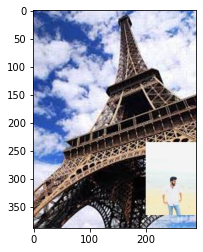

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import io
url1 = min(d,key=d.get)
url2 = 'https://storage.googleapis.com/visionland/78688170_2478754789111037_2989093759645384704_n.jpg'
im1=Image.open(url1)
im2 = Image.open(urllib.request.urlopen(url2))

resized_im1 = im1.resize((round(im1.size[0]*1.5), round(im1.size[1]*1.5)))

resized_im2=im2.resize((round(im1.size[0]*0.5),round(im1.size[1]*0.5)))
image_copy = resized_im1.copy()
position = (200, 235)
image_copy.paste(resized_im2, position)
image_copy.save('pasted_image.jpg')
im6=Image.open('C:/Users/STSC/pasted_image.jpg')
plt.imshow(im6)